In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size": 14})
plt.rcParams.update({"axes.axisbelow": True})

In [5]:
coefficients_df = pd.read_csv(
    "../data/intermediate/preference_analysis/citation_style_effects_coefficients.csv"
)

In [6]:
coefficients_df

,model_specification,model_description,feature,coefficient,ci_lower,ci_upper,significant,log_likelihood,n_features,n_battles,bootstrap_success_rate
0,basic_response,Basic response characteristics: length and cit...,response_word_count,0.600967,0.424064,0.805574,True,-916.626340,2,1534,1.0
1,basic_response,Basic response characteristics: length and cit...,num_citations,0.058178,-0.152933,0.247829,False,-916.626340,2,1534,1.0
2,proportion_news,Proportion of news sources in the citation pool.,response_word_count,0.603009,0.427774,0.810544,True,-916.377584,3,1534,1.0
3,proportion_news,Proportion of news sources in the citation pool.,num_citations,0.035222,-0.184162,0.229111,False,-916.377584,3,1534,1.0
4,proportion_news,Proportion of news sources in the citation pool.,proportion_news,-0.055987,-0.225797,0.113166,False,-916.377584,3,1534,1.0
5,bias_and_quality_all_citations,Political and quality among all citations.,response_word_count,0.609585,0.431950,0.819293,True,-915.270262,7,1534,1.0
6,bias_and_quality_all_citations,Political and quality among all citations.,num_citations,0.044760,-0.170288,0.234113,False,-915.270262,7,1534,1.0
7,bias_and_quality_all_citations,Political and quality among all citations.,proportion_left_leaning,-0.035318,-0.163958,0.099555,False,-915.270262,7,1534,1.0
8,bias_and_quality_all_citations,Political and quality among all citations.,proportion_right_leaning,0.035303,-0.099580,0.234694,False,-915.270262,7,1534,1.0
9,bias_and_quality_all_citations,Political and quality among all citations.,proportion_center_leaning,-0.098550,-0.270236,0.084725,False,-915.270262,7,1534,1.0


In [3]:
coefficients_df.feature

0                response_word_count
1                      num_citations
2                response_word_count
3                      num_citations
4                    proportion_news
5                response_word_count
6                      num_citations
7            proportion_left_leaning
8           proportion_right_leaning
9          proportion_center_leaning
10           proportion_high_quality
11            proportion_low_quality
12               response_word_count
13                     num_citations
14      news_proportion_left_leaning
15     news_proportion_right_leaning
16    news_proportion_center_leaning
17      news_proportion_high_quality
18       news_proportion_low_quality
Name: feature, dtype: object

In [8]:
feature_names = {
    "num_citations": "Citation count",
    "response_word_count": "Response word count",
    "proportion_news": "News proportion",
    "proportion_left_leaning": "News proportion - left",
    "proportion_right_leaning": "News proportion - right",
    "proportion_center_leaning": "News proportion - center",
    "proportion_high_quality": "News proportion - high-quality",
    "proportion_low_quality": "News proportion - low-quality",
    "news_proportion_left_leaning": "Proportion left-leaning news",
    "news_proportion_center_leaning": "Proportion center-leaning news",
    "news_proportion_right_leaning": "Proportion right-leaning news",
    "news_proportion_high_quality": "Proportion high-quality news",
    "news_proportion_low_quality": "Proportion low-quality news"
}

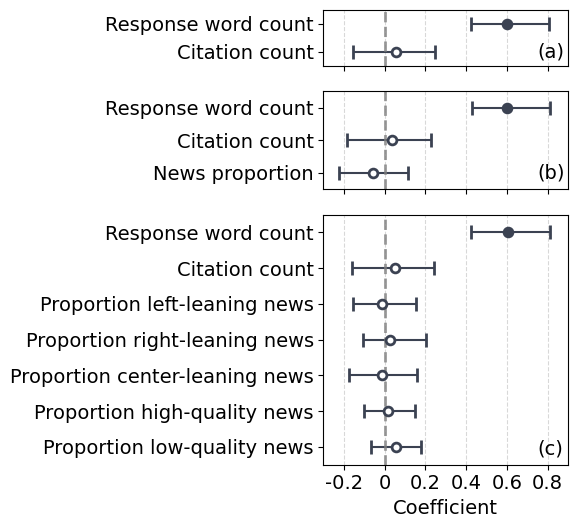

In [30]:
height_ratios = [2, 3.5, 9]
gs_kw = dict(height_ratios=height_ratios)
fig, axs = plt.subplots(nrows=3, ncols=1, gridspec_kw=gs_kw, figsize=(6, 5.5))
model_axs = zip(
    ["basic_response", "proportion_news", "bias_and_quality_news_citations"], axs
)

for model_index, (model_name, ax) in enumerate(model_axs):
    temp_df = coefficients_df.query(f"model_specification == '{model_name}'").iloc[::-1]
    y_pos = np.arange(len(temp_df))
    ax.errorbar(
        temp_df["coefficient"],
        y_pos,
        xerr=[
            temp_df["coefficient"] - temp_df["ci_lower"],
            temp_df["ci_upper"] - temp_df["coefficient"],
        ],
        fmt="o",
        capsize=5,
        capthick=2,
        color="black",
        ecolor="#3B4252",
    )
    for i, (coeff, sig) in enumerate(
        zip(temp_df["coefficient"], temp_df["significant"])
    ):
        color = "#3B4252" if sig else "white"
        ax.scatter(
            coeff, i, color=color, edgecolor="#3B4252", s=40, zorder=3, linewidths=2
        )
    n_variables = len(temp_df)
    margin = 0.5
    ax.set_ylim([-margin, len(temp_df) - 1 + margin])
    ax.set_yticks(y_pos)
    ax.set_yticklabels(temp_df["feature"].apply(feature_names.get))

    ax.set_xlim([-0.3, 0.9])
    xs = [-0.2, 0, 0.2, 0.4, 0.6, 0.8]
    ax.set_xticks(xs)

    if model_index == 2:
        ax.set_xlabel("Coefficient")
        ax.set_xticklabels(xs)
    else:
        ax.set_xticklabels([])
    ax.axvline(x=0, color="gray", linestyle="--", alpha=0.8, linewidth=2)
    ax.xaxis.grid(True, alpha=0.3, linestyle="--", color='gray')
    ax.text(0.75, -0.2, f"({'abc'[model_index]})")

plt.tight_layout()
plt.savefig("../data/output/preference_analysis/user_preference_coefficients.pdf")

In [28]:
battle_df = pd.read_parquet("../data/intermediate/preference_analysis/battle_data.parquet")

In [31]:
len(battle_df)

1534

In [29]:
battle_df

,thread_id,model_a,model_b,winner,num_responses_a,num_responses_b,primary_intent,secondary_intent,total_turns,response_length_a,...,news_proportion_low_quality_diff,news_proportion_unknown_quality_diff,news_proportion_left_leaning_diff,news_proportion_right_leaning_diff,news_proportion_center_leaning_diff,news_proportion_unknown_leaning_diff,model_a_family,model_b_family,family_matchup,cross_family_battle
0,thread_00000005,gpt-4o-mini-search-preview,sonar,model_b,1,1,Factual Lookup,Unassigned,1,3259.0,...,-0.166667,0.000000,0.333333,0.0,-0.333333,0.0,openai,perplexity,openai_vs_perplexity,True
1,thread_00000007,gpt-4o-search-preview,sonar-pro,model_b,1,1,Factual Lookup,Unassigned,1,1834.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,openai,perplexity,openai_vs_perplexity,True
2,thread_00000008,sonar,sonar-reasoning,model_b,1,1,Factual Lookup,Unassigned,1,2614.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,perplexity,perplexity,perplexity_vs_perplexity,False
3,thread_00000026,sonar-pro,gpt-4o-mini-search-preview,model_a,1,1,Factual Lookup,Unassigned,1,3766.0,...,0.000000,0.000000,0.300000,0.0,-0.300000,0.0,perplexity,openai,perplexity_vs_openai,True
4,thread_00000030,gpt-4o-search-preview,gpt-4o-mini-search-preview,model_a,1,1,Factual Lookup,Unassigned,1,1621.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,openai,openai,openai_vs_openai,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,thread_00023997,sonar-reasoning-pro-high,gemini-2.5-flash-preview-04-17-grounding,model_b,1,1,Factual Lookup,Unassigned,1,4805.0,...,0.000000,0.000000,0.166667,0.0,-0.166667,0.0,perplexity,other,perplexity_vs_other,True
1530,thread_00024014,sonar-reasoning-pro-high,sonar-pro-high,model_a,1,1,Factual Lookup,Unassigned,1,5396.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,perplexity,perplexity,perplexity_vs_perplexity,False
1531,thread_00024025,gemini-2.5-flash-preview-04-17-grounding,sonar-pro-high,model_a,1,1,Factual Lookup,Unassigned,1,8649.0,...,-0.666667,0.666667,0.000000,0.0,0.000000,0.0,other,perplexity,other_vs_perplexity,True
1532,thread_00024047,sonar-reasoning-pro-high,sonar-reasoning-pro-high,model_a,1,1,Info Synthesis,Analysis,1,6655.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,perplexity,perplexity,perplexity_vs_perplexity,False
